In [1]:
# import libaries
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.express as px

from jupyterthemes import jtplot

jtplot.style(theme = 'monokai', context = 'notebook', ticks = True, grid = False)

In [14]:
# importing the data
df = pd.read_csv('car.data', header = None )

# renaming the headers
df.rename(columns={0: "buying", 1: 'maint', 2:'doors',3: 'persons', 4:'lug_boot', 5:'safety', 6:'class'}, inplace = True)  

# Input and Target
x = df.iloc[:,0:6]  # input variables
y = df.iloc[:,6]    # target variables

,buying,maint,doors,persons,lug_boot,safety
0,vhigh,vhigh,2,2,small,low
1,vhigh,vhigh,2,2,small,med
2,vhigh,vhigh,2,2,small,high
3,vhigh,vhigh,2,2,med,low
4,vhigh,vhigh,2,2,med,med
...,...,...,...,...,...,...
1723,low,low,5more,more,med,med
1724,low,low,5more,more,med,high
1725,low,low,5more,more,big,low
1726,low,low,5more,more,big,med


In [3]:
# Closer look at the dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1728 entries, 0 to 1727
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   buying    1728 non-null   object
 1   maint     1728 non-null   object
 2   doors     1728 non-null   object
 3   persons   1728 non-null   object
 4   lug_boot  1728 non-null   object
 5   safety    1728 non-null   object
 6   class     1728 non-null   object
dtypes: object(7)
memory usage: 94.6+ KB


In [4]:
# Finding some statistical values
df.describe()

,buying,maint,doors,persons,lug_boot,safety,class
count,1728,1728,1728,1728,1728,1728,1728
unique,4,4,4,3,3,3,4
top,vhigh,vhigh,2,2,small,low,unacc
freq,432,432,432,576,576,576,1210


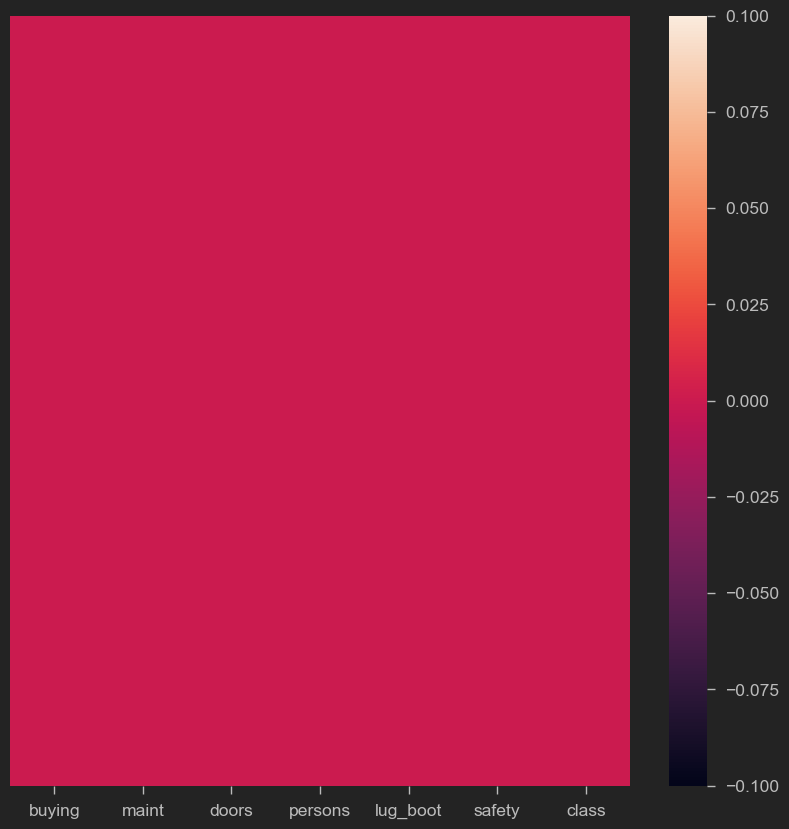

In [5]:
# Plot heatmap for checking if there is blank a.k.a NaN values

plt.figure(figsize=(10,10))
sns.heatmap(df.isnull(), yticklabels = False)
plt.show()

In [7]:
from sklearn.model_selection import train_test_split, cross_validate
from sklearn.metrics import accuracy_score, precision_score, recall_score
import warnings
warnings.filterwarnings('ignore')  # ignore warnings


import xgboost as xgb
from xgboost import XGBClassifier, XGBRegressor
from xgboost import plot_importance, plot_tree
# target_df = y.astype('category')
input_df = x.astype('category')

target_df = y.map({'acc': 0, 'good': 1, 'unacc':2, 'vgood':3})  # encoding target categorical variable

target_df

0       2
1       2
2       2
3       2
4       2
       ..
1723    1
1724    3
1725    2
1726    1
1727    3
Name: class, Length: 1728, dtype: int64

In [8]:
# XGBoosing 
model = xgb.XGBClassifier(learning_rate = 0.1, max_depth = 50, n_estimators = 100, enable_categorical = True, tree_method='hist')

X_train, X_test, y_train, y_test = train_test_split(input_df, target_df, test_size = 0.2)

model.fit(X_train, y_train)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, early_stopping_rounds=None,
              enable_categorical=True, eval_metric=None, feature_types=None,
              gamma=None, gpu_id=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=0.1, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=50, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              n_estimators=100, n_jobs=None, num_parallel_tree=None,
              objective='multi:softprob', predictor=None, ...)

In [9]:
# Training result
result_train = model.score(X_train, y_train)
result_train

# The score here is Coefficient of Determination.

1.0

In [10]:
# Testing result
result_test = model.score(X_test, y_test)
result_test

0.976878612716763

In [11]:
y_predict = model.predict(X_test)

## Classification_report
### https://scikit-learn.org/stable/modules/generated/sklearn.metrics.classification_report.html
### https://www.v7labs.com/blog/f1-score-guide


In [12]:
from sklearn.metrics import confusion_matrix, classification_report

print(classification_report(y_test, y_predict)) # y_test = y_tr

              precision    recall  f1-score   support

           0       0.92      0.95      0.94        64
           1       0.75      0.82      0.78        11
           2       1.00      0.99      0.99       256
           3       1.00      1.00      1.00        15

    accuracy                           0.98       346
   macro avg       0.92      0.94      0.93       346
weighted avg       0.98      0.98      0.98       346



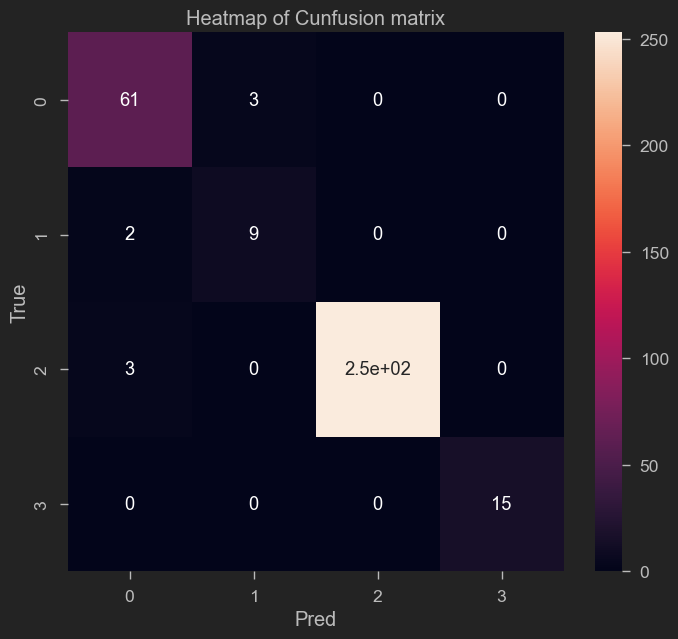

In [16]:
# Visualize Confusion Matrix
cm = confusion_matrix(y_test ,y_predict)

sns.heatmap(cm, annot = True) # Error showing only the first row of the heatmap
plt.title('Heatmap of Cunfusion matrix')
plt.xlabel('Pred')
plt.ylabel('True')

plt.show()